# Time Series Employment Analysis of NAICS
The North American Industry Classification System (NAICS) is an industry classification system developed by the statistical agencies of Canada, Mexico and the United States. NAICS is designed to provide common definitions of the industrial structure of the three countries and a common statistical framework to facilitate the analysis of the three economies

# Import the essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Reading data

In [2]:
lmo_data = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
lmo_data.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [3]:
lmo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  59 non-null     object
 1   NAICS                  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [4]:
lmo_data['clean_NAICS'] = lmo_data['NAICS'].astype(str).str.replace(' &', ' ').str.split()
lmo_data.head()

,LMO_Detailed_Industry,NAICS,clean_NAICS
0,Farms,111 & 112,"[111, 112]"
1,"Fishing, hunting and trapping",114,[114]
2,Forestry and logging,113,[113]
3,Support activities for agriculture and forestry,115,[115]
4,Oil and gas extraction,211,[211]


# 2 digit data

In [5]:
df_2_naics = pd.read_csv('RTRA_Employ_2NAICS_00_05.csv')


file_2_naics = ['RTRA_Employ_2NAICS_06_10.csv', 'RTRA_Employ_2NAICS_11_15.csv',
                'RTRA_Employ_2NAICS_16_20.csv', 'RTRA_Employ_2NAICS_97_99.csv']


for i in file_2_naics:
    df = pd.read_csv(i)
    df_2_naics = df_2_naics.append(df, ignore_index=True)

df_2_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [6]:
df_2_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         5472 non-null   int64 
 1   SMTH          5472 non-null   int64 
 2   NAICS         5472 non-null   object
 3   _EMPLOYMENT_  5472 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 171.1+ KB


In [7]:
df1 = pd.DataFrame(df_2_naics['NAICS'].str.split('[').tolist(), columns=["NAICS", "CODE"])
df1 = pd.DataFrame(df1['CODE'].str.replace(']', '').str.split('-').tolist(), columns=["lower_code", "upper_code"])
df1.head()

,lower_code,upper_code
0,72,None
1,56,None
2,11,None
3,71,None
4,23,None


In [8]:
df_2_naics = pd.concat([df_2_naics,df1],axis=1)
df_2_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code
0,2000,1,Accommodation and food services [72],148000,72,None
1,2000,1,"Administrative and support, waste management a...",59250,56,None
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None
4,2000,1,Construction [23],106250,23,None


In [9]:
def add_lmo_industry(df):
    lmo_df = lmo_data.apply(lambda x: x["LMO_Detailed_Industry"] 
                                                if ((df['lower_code'] in x['clean_NAICS']) or (df['upper_code'] in x['clean_NAICS']))
                                                else np.nan, axis=1)
    lmo_df = lmo_df.dropna(how='all', axis=0)
    if lmo_df.empty:
        lmo_df = np.nan
    else:
        lmo_df = lmo_df.to_string(index=False)
    return lmo_df

In [10]:
# Get the LMO_Detailed_Industry for the 2digit NAICS RTRA file
df_2_naics["LMO_Detailed_Industry"] = df_2_naics.apply(add_lmo_industry, axis=1)
df_2_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code,LMO_Detailed_Industry
0,2000,1,Accommodation and food services [72],148000,72,None,NaN
1,2000,1,"Administrative and support, waste management a...",59250,56,None,"Business, building and other support services"
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None,NaN
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None,NaN
4,2000,1,Construction [23],106250,23,None,Construction


# 3 digit data

In [11]:
df_3_naics = pd.read_csv('RTRA_Employ_3NAICS_00_05.csv')


file_3_naics = ['RTRA_Employ_3NAICS_06_10.csv', 'RTRA_Employ_3NAICS_11_15.csv',
                'RTRA_Employ_3NAICS_16_20.csv', 'RTRA_Employ_3NAICS_97_99.csv']
for i in file_3_naics:
    df = pd.read_csv(i)
    df_3_naics = df_3_naics.append(df, ignore_index=True)

df_3_naics.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Aboriginal public administration[914],500
1,2000,1,Accommodation services[721],33750
2,2000,1,Administrative and support services[561],55250
3,2000,1,Air transportation[481],17500
4,2000,1,Ambulatory health care services[621],53000


In [12]:
# Separate the Industry description and NAICS code
df1 = pd.DataFrame(df_3_naics['NAICS'].str.split('[').tolist(), columns=["NAICS", "CODE"])
df1["CODE"] = df1['CODE'].str.replace(']', '')
df1.head()

,NAICS,CODE
0,Aboriginal public administration,914
1,Accommodation services,721
2,Administrative and support services,561
3,Air transportation,481
4,Ambulatory health care services,621


In [13]:
# Maintaining the table consistent as of 2-digit NAICS dataframe
df_3_naics["lower_code"] = df1["CODE"]
df_3_naics["upper_code"] = None
df_3_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code
0,2000,1,Aboriginal public administration[914],500,914,None
1,2000,1,Accommodation services[721],33750,721,None
2,2000,1,Administrative and support services[561],55250,561,None
3,2000,1,Air transportation[481],17500,481,None
4,2000,1,Ambulatory health care services[621],53000,621,None


In [14]:
df_3_naics["LMO_Detailed_Industry"] = df_3_naics.apply(add_lmo_industry, axis=1)
df_3_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code,LMO_Detailed_Industry
0,2000,1,Aboriginal public administration[914],500,914,None,Local and Indigenous public administration
1,2000,1,Accommodation services[721],33750,721,None,Accommodation services
2,2000,1,Administrative and support services[561],55250,561,None,NaN
3,2000,1,Air transportation[481],17500,481,None,Air transportation
4,2000,1,Ambulatory health care services[621],53000,621,None,Ambulatory health care services


# 4 digit data

In [15]:
# Get the data of 4-digit NAICS industries
df_4_naics = pd.read_csv('RTRA_Employ_4NAICS_00_05.csv')


file_4_naics = ['RTRA_Employ_4NAICS_06_10.csv', 'RTRA_Employ_4NAICS_11_15.csv',
                'RTRA_Employ_4NAICS_16_20.csv', 'RTRA_Employ_4NAICS_97_99.csv']


for i in file_4_naics:
    df = pd.read_csv(i)
    df_4_naics = df_4_naics.append(df, ignore_index=True)

df_4_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,1100,500
1,2000,1,1111,0
2,2000,1,1112,2000
3,2000,1,1113,250
4,2000,1,1114,7750


In [16]:
# Maintaning the shape of dataframe_4_naics as of dataframe_2_naics
df_4_naics["lower_code"] = df_4_naics["NAICS"]
df_4_naics["upper_code"] = None
df_4_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code
0,2000,1,1100,500,1100,None
1,2000,1,1111,0,1111,None
2,2000,1,1112,2000,1112,None
3,2000,1,1113,250,1113,None
4,2000,1,1114,7750,1114,None


In [17]:
# Get the LMO_Detailed_Industry for the 4-digits NAICS RTRA file
df_4_naics["LMO_Detailed_Industry"] = df_4_naics.apply(add_lmo_industry, axis=1)
df_4_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code,LMO_Detailed_Industry
0,2000,1,1100,500,1100,None,NaN
1,2000,1,1111,0,1111,None,NaN
2,2000,1,1112,2000,1112,None,NaN
3,2000,1,1113,250,1113,None,NaN
4,2000,1,1114,7750,1114,None,NaN


In [18]:
cols = ["SYEAR", "SMTH", "LMO_Detailed_Industry", "_EMPLOYMENT_"]

# Creating a single dataframe with the columns Year, Month and LMO Industry and Employment from all the 2, 3 and 4 digits NAICS
naics_employment_detail_df = df_2_naics[cols]
naics_employment_detail_df = naics_employment_detail_df.append(df_3_naics[cols], ignore_index=True)
naics_employment_detail_df = naics_employment_detail_df.append(df_4_naics[cols], ignore_index=True)

naics_employment_detail_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,2000,1,NaN,148000
1,2000,1,"Business, building and other support services",59250
2,2000,1,NaN,61750
3,2000,1,NaN,39500
4,2000,1,Construction,106250


In [19]:

naics_employment_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119184 entries, 0 to 119183
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   SYEAR                  119184 non-null  int64 
 1   SMTH                   119184 non-null  int64 
 2   LMO_Detailed_Industry  15408 non-null   object
 3   _EMPLOYMENT_           119184 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.6+ MB


as we see in the info there is a lot of missing values in LMO_Detailed_Industry so i will drop any row that contain null value

In [20]:
naics_employment_detail_df = naics_employment_detail_df.dropna(axis=0, how='any')
naics_employment_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15408 entries, 1 to 33611
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SYEAR                  15408 non-null  int64 
 1   SMTH                   15408 non-null  int64 
 2   LMO_Detailed_Industry  15408 non-null  object
 3   _EMPLOYMENT_           15408 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 601.9+ KB


In [21]:
naics_employment_detail_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
1,2000,1,"Business, building and other support services",59250
4,2000,1,Construction,106250
9,2000,1,"Business, building and other support services",1000
12,2000,1,"Repair, personal and non-profit services",100250
15,2000,1,Real estate rental and leasing,37500


In [22]:
# Calculate the Employment summary by Year, Month and LOM Industry
naics_employment_summary = naics_employment_detail_df.groupby(["SYEAR", "SMTH", "LMO_Detailed_Industry"], as_index=False).sum()
naics_employment_summary.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Broadcasting, data processing, and information",5000


In [23]:
# Read 'Data_Output_Template' file
data_output = pd.read_excel('Data_Output_Template.xlsx')
data_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


In [24]:
# Crate Year, Month and LMO_Detailed_industry combined idx to get the data_output formated result
naics_employment_summary1 = naics_employment_summary.copy()
naics_employment_summary1['idx'] = naics_employment_summary1["SYEAR"].astype(str) + '-' + naics_employment_summary1["SMTH"].astype(str) + '-' + naics_employment_summary1["LMO_Detailed_Industry"]
data_output1 = data_output.copy()
data_output1['idx'] = data_output1["SYEAR"].astype(str) + '-' + data_output1["SMTH"].astype(str) + '- ' + data_output1["LMO_Detailed_Industry"]
data_output1.head()


,SYEAR,SMTH,LMO_Detailed_Industry,Employment,idx
0,1997,1,Accommodation services,NaN,1997-1- Accommodation services
1,1997,1,Air transportation,NaN,1997-1- Air transportation
2,1997,1,Ambulatory health care services,NaN,1997-1- Ambulatory health care services
3,1997,1,"Amusement, gambling and recreation industries",NaN,"1997-1- Amusement, gambling and recreation ind..."
4,1997,1,"Architectural, engineering and related services",NaN,"1997-1- Architectural, engineering and related..."


In [25]:
data_output1.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,idx
0,1997,1,Accommodation services,NaN,1997-1- Accommodation services
1,1997,1,Air transportation,NaN,1997-1- Air transportation
2,1997,1,Ambulatory health care services,NaN,1997-1- Ambulatory health care services
3,1997,1,"Amusement, gambling and recreation industries",NaN,"1997-1- Amusement, gambling and recreation ind..."
4,1997,1,"Architectural, engineering and related services",NaN,"1997-1- Architectural, engineering and related..."


In [26]:
data_output1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SYEAR                  15576 non-null  int64  
 1   SMTH                   15576 non-null  int64  
 2   LMO_Detailed_Industry  15576 non-null  object 
 3   Employment             0 non-null      float64
 4   idx                    15576 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 608.6+ KB


In [27]:
naics_employment_summary1.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_,idx
0,1997,1,Accommodation services,24000,1997-1- Accommodation services
1,1997,1,Air transportation,17000,1997-1- Air transportation
2,1997,1,Ambulatory health care services,40000,1997-1- Ambulatory health care services
3,1997,1,"Amusement, gambling and recreation industries",20000,"1997-1- Amusement, gambling and recreation ind..."
4,1997,1,"Broadcasting, data processing, and information",5000,"1997-1- Broadcasting, data processing, and inf..."


In [28]:
naics_employment_summary1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 13523
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SYEAR                  13524 non-null  int64 
 1   SMTH                   13524 non-null  int64 
 2   LMO_Detailed_Industry  13524 non-null  object
 3   _EMPLOYMENT_           13524 non-null  int64 
 4   idx                    13524 non-null  object
dtypes: int64(3), object(2)
memory usage: 633.9+ KB


In [29]:
# Merge the two dataframes data_output1 and naics_employment_summary1
combined_data = pd.merge(data_output1, naics_employment_summary1, left_on='idx', right_on='idx', how='left')
combined_data.head()

,SYEAR_x,SMTH_x,LMO_Detailed_Industry_x,Employment,idx,SYEAR_y,SMTH_y,LMO_Detailed_Industry_y,_EMPLOYMENT_
0,1997,1,Accommodation services,NaN,1997-1- Accommodation services,1997.0,1.0,Accommodation services,24000.0
1,1997,1,Air transportation,NaN,1997-1- Air transportation,1997.0,1.0,Air transportation,17000.0
2,1997,1,Ambulatory health care services,NaN,1997-1- Ambulatory health care services,1997.0,1.0,Ambulatory health care services,40000.0
3,1997,1,"Amusement, gambling and recreation industries",NaN,"1997-1- Amusement, gambling and recreation ind...",1997.0,1.0,"Amusement, gambling and recreation industries",20000.0
4,1997,1,"Architectural, engineering and related services",NaN,"1997-1- Architectural, engineering and related...",NaN,NaN,NaN,NaN


In [30]:
# Fille tha NaN values with zero in '_EMPLOYMENT_' column
combined_data["_EMPLOYMENT_"] = combined_data["_EMPLOYMENT_"].fillna(0)
combined_data.head()

,SYEAR_x,SMTH_x,LMO_Detailed_Industry_x,Employment,idx,SYEAR_y,SMTH_y,LMO_Detailed_Industry_y,_EMPLOYMENT_
0,1997,1,Accommodation services,NaN,1997-1- Accommodation services,1997.0,1.0,Accommodation services,24000.0
1,1997,1,Air transportation,NaN,1997-1- Air transportation,1997.0,1.0,Air transportation,17000.0
2,1997,1,Ambulatory health care services,NaN,1997-1- Ambulatory health care services,1997.0,1.0,Ambulatory health care services,40000.0
3,1997,1,"Amusement, gambling and recreation industries",NaN,"1997-1- Amusement, gambling and recreation ind...",1997.0,1.0,"Amusement, gambling and recreation industries",20000.0
4,1997,1,"Architectural, engineering and related services",NaN,"1997-1- Architectural, engineering and related...",NaN,NaN,NaN,0.0


In [31]:
# Get the month wise employment summary data into "Employment" column of dat_output dataframe
data_output["Employment"] = combined_data["_EMPLOYMENT_"].astype(np.int)
print(data_output.info())
data_output.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SYEAR                  15576 non-null  int64 
 1   SMTH                   15576 non-null  int64 
 2   LMO_Detailed_Industry  15576 non-null  object
 3   Employment             15576 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 486.9+ KB
None


,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Architectural, engineering and related services",0


In [32]:
# Export data_output to excel file
data_output.to_excel('Data_Output.xlsx', header=True, index=False)

# EDA

In [33]:
# create a dataframe with industry wise employment summary
industry_wise_summary = data_output.groupby(["LMO_Detailed_Industry"])[["Employment"]].sum().sort_values(by='Employment',ascending=False)
industry_wise_summary.head()

,Employment
LMO_Detailed_Industry,
Construction,45485000
Food services and drinking places,35033250
"Repair, personal and non-profit services",26021250
"Business, building and other support services",23018500
Hospitals,22518250


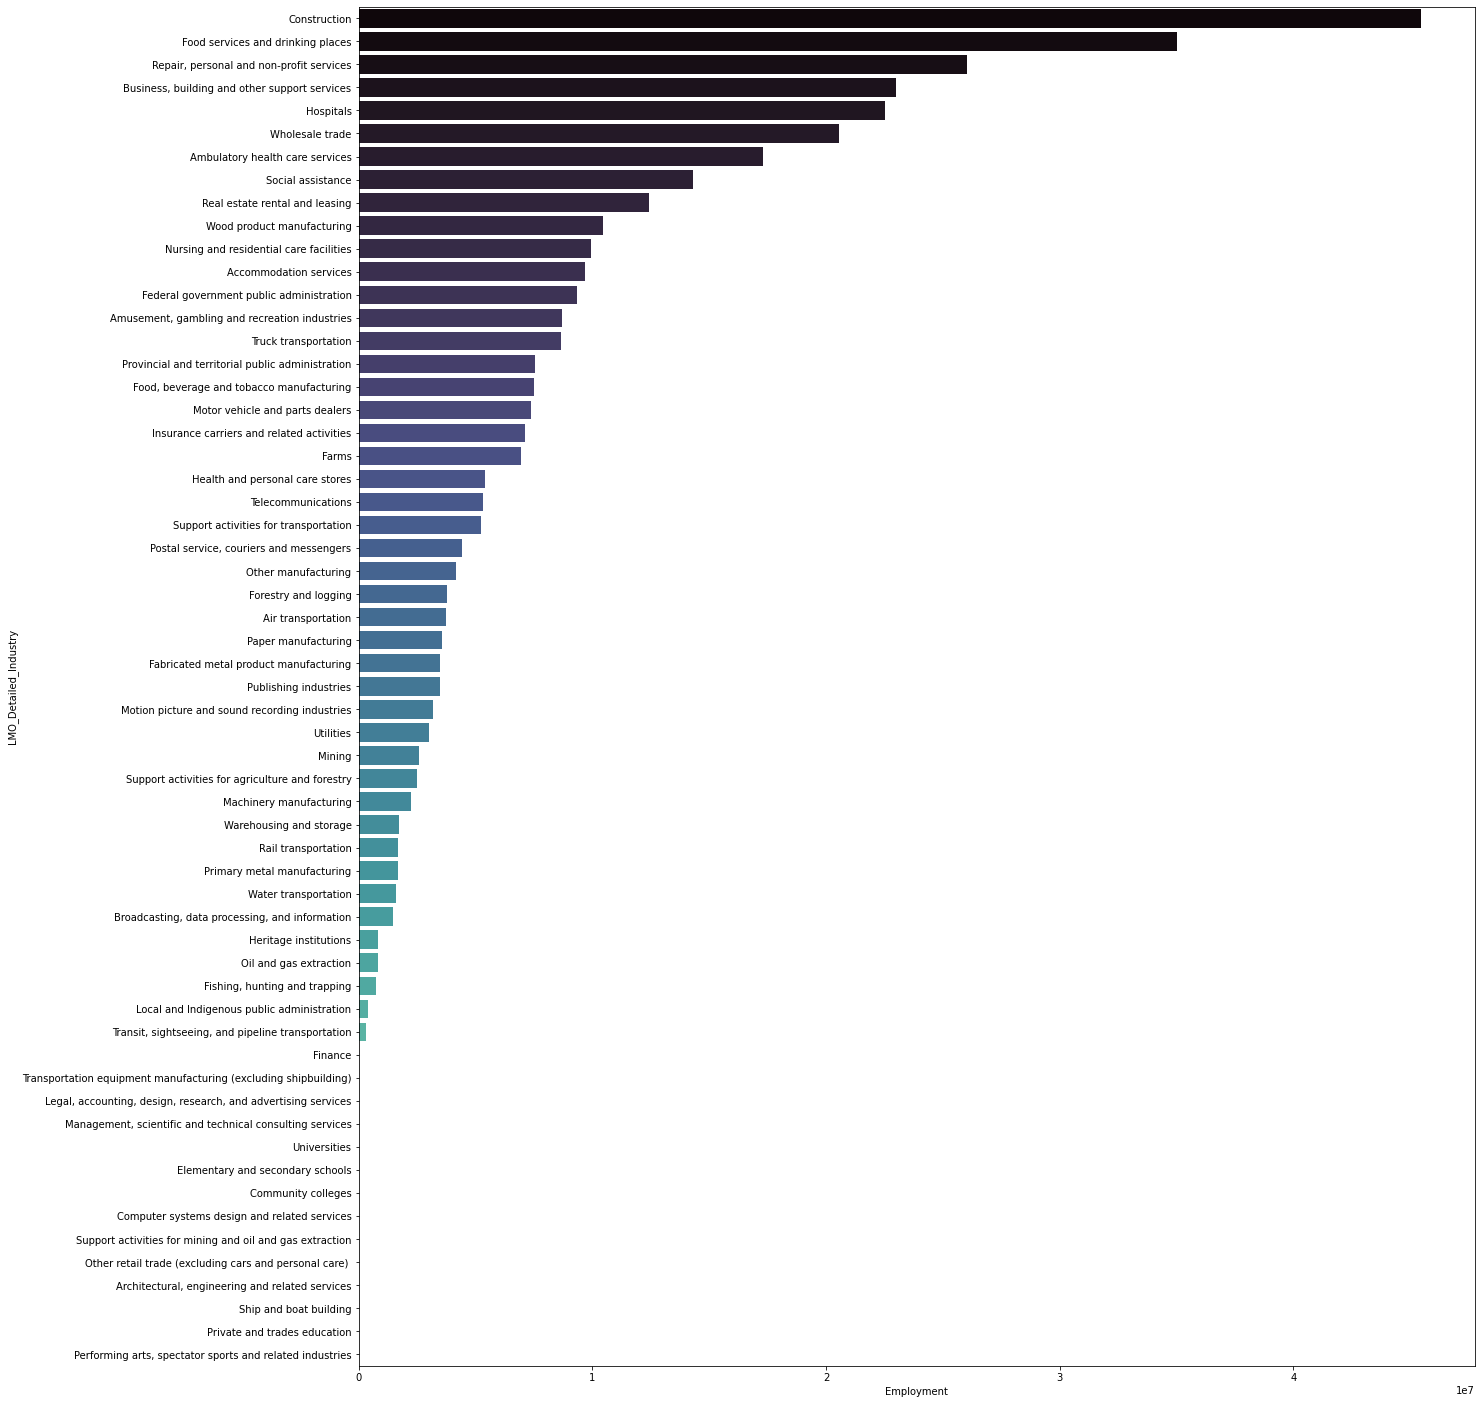

In [34]:
plt.figure(figsize=[20,25])
sns.barplot(x=industry_wise_summary.Employment,y=industry_wise_summary.index,palette='mako');


As the figure above the construction field is the highest one in employment but i`m really interested to do analysis on hospital field to see the evaluation

# Time series employment in Hospial

In [36]:
# Create a dataframe with Year and Month as index
month_wise_employment_summary = data_output.copy()
month_wise_employment_summary['month_idx'] = pd.to_datetime([f'{y}-{m}' for y, m in zip(month_wise_employment_summary.SYEAR, month_wise_employment_summary.SMTH)])
month_wise_employment_summary.index = month_wise_employment_summary["month_idx"]
month_wise_employment_summary.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,month_idx
month_idx,,,,,
1997-01-01,1997,1,Accommodation services,24000,1997-01-01
1997-01-01,1997,1,Air transportation,17000,1997-01-01
1997-01-01,1997,1,Ambulatory health care services,40000,1997-01-01
1997-01-01,1997,1,"Amusement, gambling and recreation industries",20000,1997-01-01
1997-01-01,1997,1,"Architectural, engineering and related services",0,1997-01-01


In [37]:
hospital_data = month_wise_employment_summary[month_wise_employment_summary["LMO_Detailed_Industry"] == "Hospitals"]
hospital_data.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,month_idx
month_idx,,,,,
1997-01-01,1997,1,Hospitals,62000,1997-01-01
1997-02-01,1997,2,Hospitals,61750,1997-02-01
1997-03-01,1997,3,Hospitals,62250,1997-03-01
1997-04-01,1997,4,Hospitals,68000,1997-04-01
1997-05-01,1997,5,Hospitals,71000,1997-05-01


Text(0, 0.5, 'Employment')

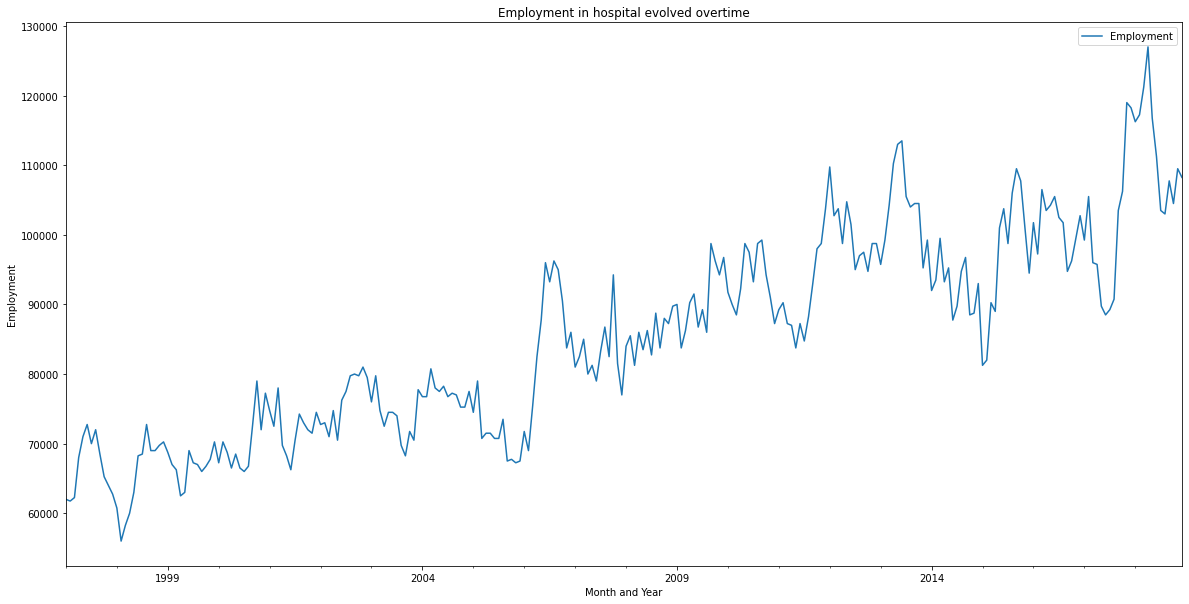

In [38]:
hospital_data.plot(y="Employment", title="Employment in hospital evolved overtime", figsize=(20,10))
plt.xlabel("Month and Year")
plt.ylabel("Employment")

As we see this field increase over time and i think this field will increase more because the period we are passing through covid 19 

# the hospitals employment compairing to the total

In [50]:
month_wise_employment_summary.columns

Index(['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment', 'month_idx'], dtype='object')

In [57]:
month_wise_employment_summary.columns = month_wise_employment_summary.columns.str.replace('_',' ')

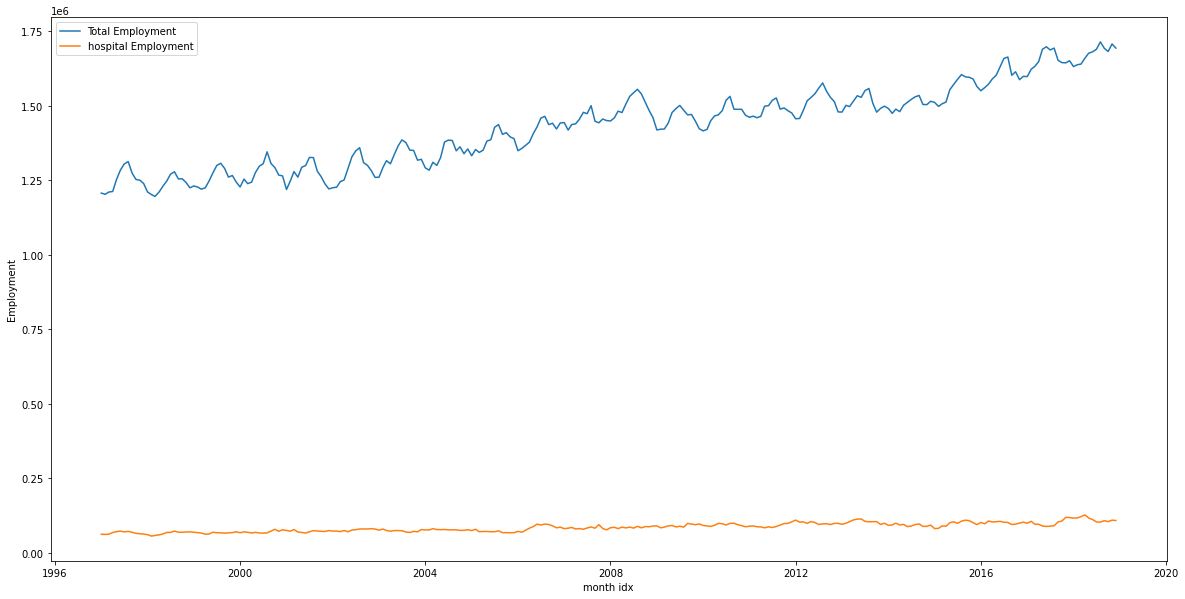

In [60]:
total_employment_summary = month_wise_employment_summary.groupby("month idx")["Employment"].sum()
total_employment_summary = total_employment_summary.reset_index()
# total_employment_summary.head()
plt.figure(figsize=(20,10))
sns.lineplot(x="month idx", y="Employment", data=total_employment_summary, label="Total Employment")
sns.lineplot(x="month_idx", y="Employment", data=hospital_data, label="hospital Employment")
plt.title("")
plt.show()

In [63]:
hospital_data.columns=hospital_data.columns.str.replace('_',' ')

In [64]:
# Calculating the percentage of Employment contributed by Construction Industry
hospital_perc_df = pd.merge(left=total_employment_summary, right=hospital_data, left_on="month idx", right_on="month idx", how="left")
hospital_perc_df["Employment_perc"] = hospital_perc_df["Employment_y"] / hospital_perc_df["Employment_x"] * 100
hospital_perc_df.head()

,month idx,Employment_x,SYEAR,SMTH,LMO Detailed Industry,Employment_y,Employment_perc
0,1997-01-01,1207250,1997,1,Hospitals,62000,5.135639
1,1997-02-01,1203250,1997,2,Hospitals,61750,5.131934
2,1997-03-01,1210750,1997,3,Hospitals,62250,5.141441
3,1997-04-01,1212750,1997,4,Hospitals,68000,5.607091
4,1997-05-01,1253000,1997,5,Hospitals,71000,5.666401


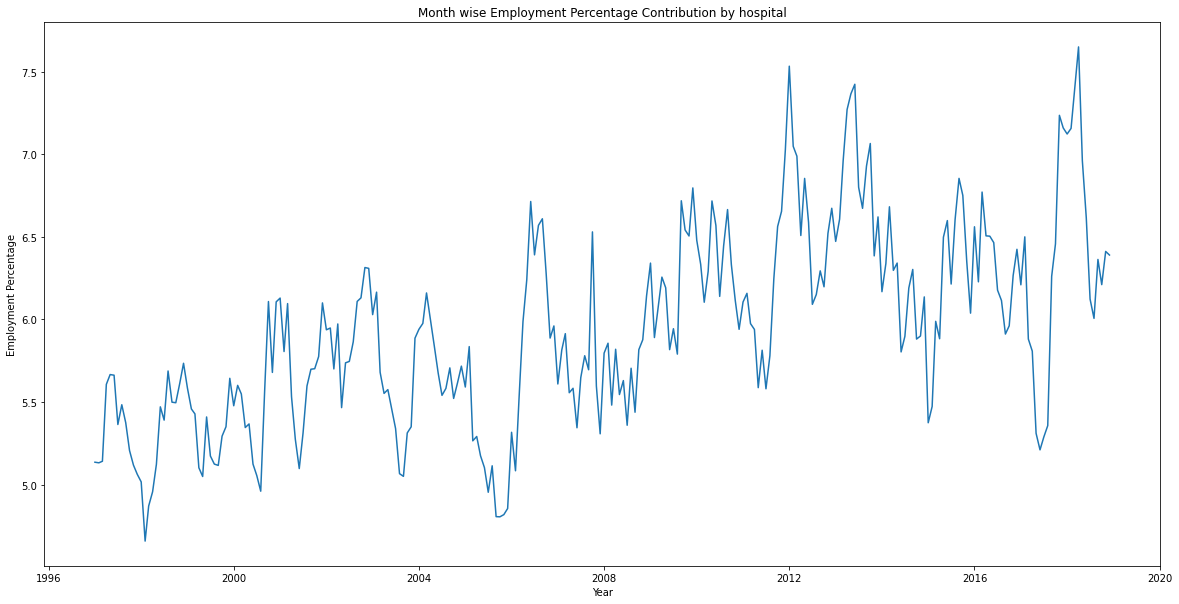

In [65]:
plt.figure(figsize=(20,10))
sns.lineplot(x="month idx", y="Employment_perc", data=hospital_perc_df)
plt.xlabel("Year")
plt.ylabel("Employment Percentage")
plt.title("Month wise Employment Percentage Contribution by hospital")
plt.show()

In [66]:
lmo_data[lmo_data["LMO_Detailed_Industry"] == "Hospitals"]

,LMO_Detailed_Industry,NAICS,clean_NAICS
43,Hospitals,622,[622]


In [69]:
# Subsectors contibution towards the Hospital Sector
hospital_subsector_data = df_3_naics[df_3_naics["lower_code"].str.match(r'62[0-9]') == True]
hospital_subsector_summary = hospital_subsector_data.groupby(["SYEAR", "NAICS"])["_EMPLOYMENT_"].sum()
hospital_subsector_summary = hospital_subsector_summary.reset_index()
hospital_subsector_summary.head()

,SYEAR,NAICS,_EMPLOYMENT_
0,1997,Ambulatory health care services[621],553750
1,1997,Hospitals[622],800250
2,1997,Nursing and residential care facilities[623],364250
3,1997,Social assistance[624],583250
4,1998,Ambulatory health care services[621],559500


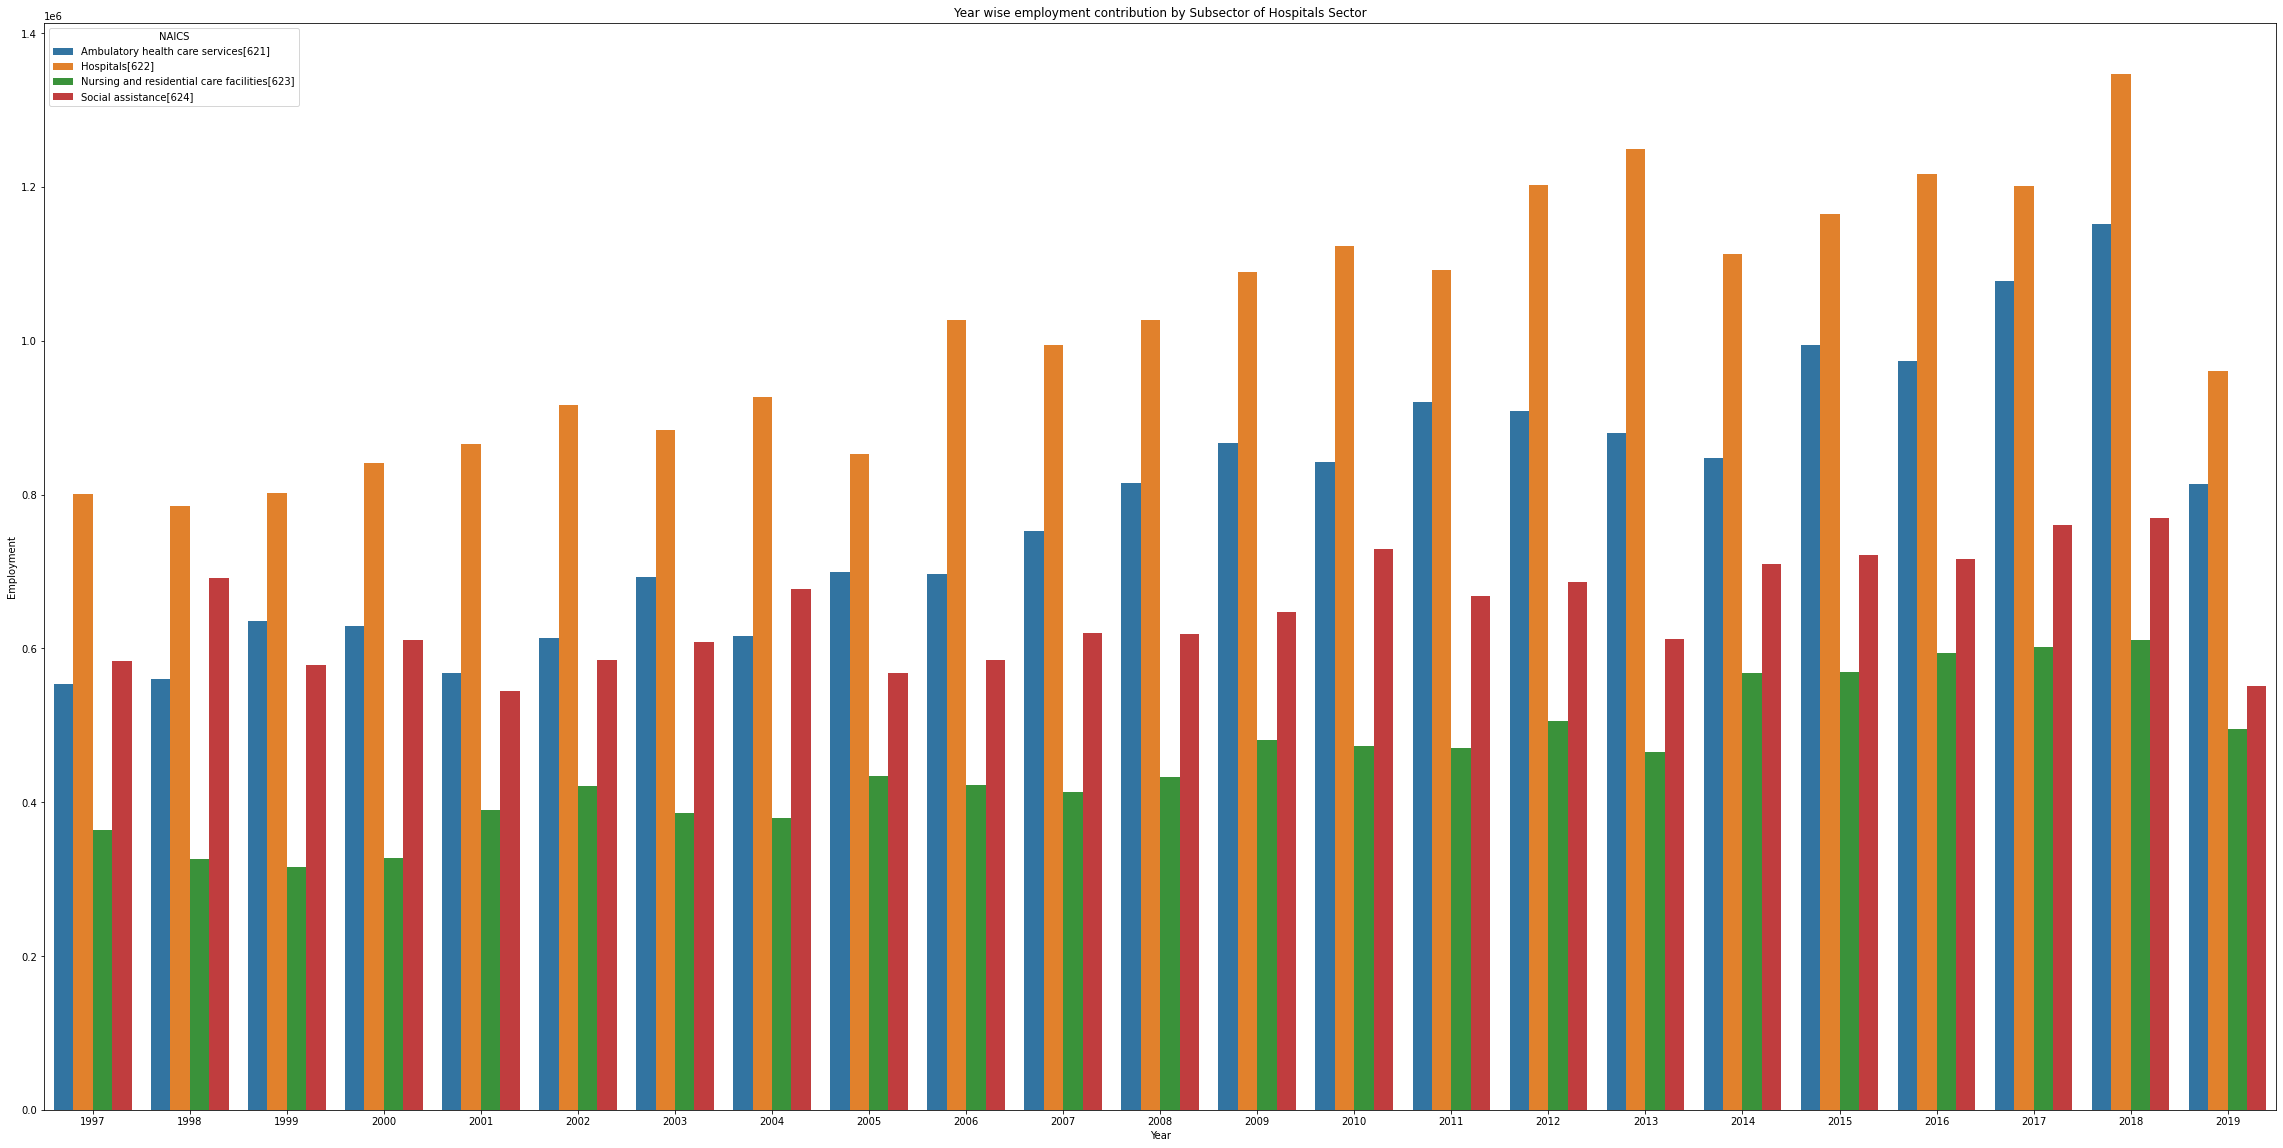

In [70]:
plt.figure(figsize=(40,20))
sns.barplot(x="SYEAR", y="_EMPLOYMENT_", hue="NAICS", data=hospital_subsector_summary)
plt.xlabel("Year")
plt.ylabel("Employment")
plt.title("Year wise employment contribution by Subsector of Hospitals Sector")
plt.show()

In [73]:
# Subsectors contibution towards the hospital Sector
hospital_subsector = hospital_subsector_data.groupby(["NAICS"])["_EMPLOYMENT_"].sum().sort_values(ascending=False)
hospital_subsector = hospital_subsector.reset_index()
hospital_subsector.head()

,NAICS,_EMPLOYMENT_
0,Hospitals[622],23478750
1,Ambulatory health care services[621],18106500
2,Social assistance[624],14841500
3,Nursing and residential care facilities[623],10444250


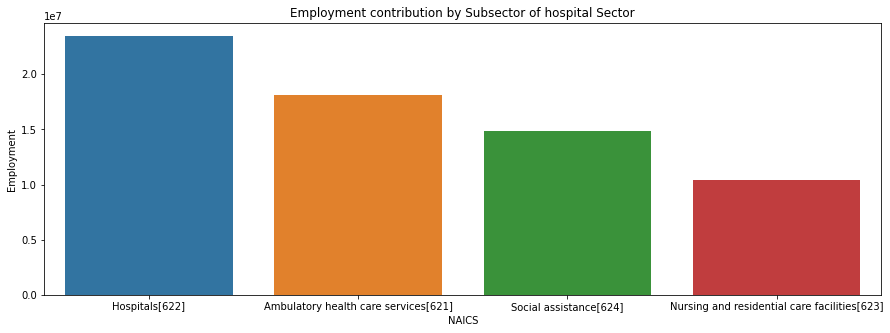

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(x="NAICS", y="_EMPLOYMENT_", data=hospital_subsector)
plt.ylabel("Employment")
plt.title("Employment contribution by Subsector of hospital Sector")
plt.show()

# Conclusion
the construction field is the highest but in next few years the hospital sector will grow due to pandemic covid 19 most of countries will invest more and more in the health sector 